In [60]:
#from __future__ import absolute_import, division, print_function, unicode_literals
#from realistic_python_call import ffi
import numpy as np
import sys
#sys.argv = ['pdm']
import tensorflow as tf

from tensorflow.python import keras
from matplotlib import pyplot as plt


class MyConvClass:
    def __init__(self):
        print ("in constructor of MyConvClass")
        self.bt=4
        self.L_ts = 10*self.bt
        self.Ndata = 360000 #data_dqmc.shape[0] 
        self.Ntrain=300000
        #self.Ntrain=8000
        self.Ntest=self.Ndata-self.Ntrain
        self.endpoint=362 #182
        self.x_train = np.zeros((self.Ntrain,3*self.L_ts,6),dtype='float')
        self.y_train = np.zeros((self.Ntrain),dtype='float')
        self.x_test = np.zeros((self.Ntest,3*self.L_ts,6),dtype='float')
        self.y_test = np.zeros((self.Ntest),dtype='float')
        self.x_frtrn = np.zeros((1,3*self.L_ts,6),dtype='float')
        self.batch_size = 1000
        self.epochs = 50
        self.learning_rate = 0.001
    
        self.output = self.create_model() 
    
        self.loss = 'logcosh' # 'mean_squared_error'

        self.optim = tf.keras.optimizers.Adam(learning_rate=self.learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    

    def load_data(self):
        print('now loading data')
        data_dqmc = np.loadtxt("DataBlockOut.txt", usecols = range(0,363))  #bt=4
        L_ts = self.L_ts
        endpoint = self.endpoint
        Ntrain = self.Ntrain
        for i in range(Ntrain):
            cnt=0
            for j in range(self.L_ts):
                self.x_train[i,cnt,0] = data_dqmc[i,2+L_ts*5+j] - data_dqmc[i,endpoint]
                self.x_train[i,cnt,1] = data_dqmc[i,2+L_ts*3+j] - data_dqmc[i,endpoint]
                self.x_train[i,cnt,2] = data_dqmc[i,2+L_ts*0+j] - data_dqmc[i,endpoint]
                self.x_train[i,cnt,3] = data_dqmc[i,2+L_ts*5+j] 
                self.x_train[i,cnt,4] = data_dqmc[i,2+L_ts*3+j]
                self.x_train[i,cnt,5] = data_dqmc[i,2+L_ts*0+j]
                self.x_train[i,cnt+1,0] = data_dqmc[i,2+L_ts*6+j] - data_dqmc[i,endpoint]
                self.x_train[i,cnt+1,1] = data_dqmc[i,2+L_ts*8+j]
                self.x_train[i,cnt+1,2] = data_dqmc[i,2+L_ts*1+j] - data_dqmc[i,endpoint]
                self.x_train[i,cnt+1,3] = data_dqmc[i,2+L_ts*6+j]
                self.x_train[i,cnt+1,4] = data_dqmc[i,2+L_ts*8+j] + data_dqmc[i,endpoint]
                self.x_train[i,cnt+1,5] = data_dqmc[i,2+L_ts*1+j]
                self.x_train[i,cnt+2,0] = data_dqmc[i,2+L_ts*7+j] - data_dqmc[i,endpoint]
                self.x_train[i,cnt+2,1] = data_dqmc[i,2+L_ts*4+j] - data_dqmc[i,endpoint]
                self.x_train[i,cnt+2,2] = data_dqmc[i,2+L_ts*2+j] - data_dqmc[i,endpoint]
                self.x_train[i,cnt+2,3] = data_dqmc[i,2+L_ts*7+j] 
                self.x_train[i,cnt+2,4] = data_dqmc[i,2+L_ts*4+j]
                self.x_train[i,cnt+2,5] = data_dqmc[i,2+L_ts*2+j]
                cnt +=3
        for i in range(self.Ntest):
            cnt=0
            for j in range(self.L_ts):
                self.x_test[i,cnt,0] = data_dqmc[i+Ntrain,2+L_ts*5+j] - data_dqmc[i+Ntrain,endpoint]
                self.x_test[i,cnt,1] = data_dqmc[i+Ntrain,2+L_ts*3+j] - data_dqmc[i+Ntrain,endpoint]
                self.x_test[i,cnt,2] = data_dqmc[i+Ntrain,2+L_ts*0+j] - data_dqmc[i+Ntrain,endpoint]
                self.x_test[i,cnt,3] = data_dqmc[i+Ntrain,2+L_ts*5+j] 
                self.x_test[i,cnt,4] = data_dqmc[i+Ntrain,2+L_ts*3+j]
                self.x_test[i,cnt,5] = data_dqmc[i+Ntrain,2+L_ts*0+j]
                self.x_test[i,cnt+1,0] = data_dqmc[i+Ntrain,2+L_ts*6+j] - data_dqmc[i+Ntrain,endpoint]
                self.x_test[i,cnt+1,1] = data_dqmc[i+Ntrain,2+L_ts*8+j]
                self.x_test[i,cnt+1,2] = data_dqmc[i+Ntrain,2+L_ts*1+j] - data_dqmc[i+Ntrain,endpoint]
                self.x_test[i,cnt+1,3] = data_dqmc[i+Ntrain,2+L_ts*6+j]
                self.x_test[i,cnt+1,4] = data_dqmc[i+Ntrain,2+L_ts*8+j] + data_dqmc[i+Ntrain,endpoint]
                self.x_test[i,cnt+1,5] = data_dqmc[i+Ntrain,2+L_ts*1+j]
                self.x_test[i,cnt+2,0] = data_dqmc[i+Ntrain,2+L_ts*7+j] - data_dqmc[i+Ntrain,endpoint]
                self.x_test[i,cnt+2,1] = data_dqmc[i+Ntrain,2+L_ts*4+j] - data_dqmc[i+Ntrain,endpoint]
                self.x_test[i,cnt+2,2] = data_dqmc[i+Ntrain,2+L_ts*2+j] - data_dqmc[i+Ntrain,endpoint]
                self.x_test[i,cnt+2,3] = data_dqmc[i+Ntrain,2+L_ts*7+j] 
                self.x_test[i,cnt+2,4] = data_dqmc[i+Ntrain,2+L_ts*4+j]
                self.x_test[i,cnt+2,5] = data_dqmc[i+Ntrain,2+L_ts*2+j]
                cnt +=3

        self.y_train = data_dqmc[0:self.Ntrain,1]
        self.y_test = data_dqmc[self.Ntrain:self.Ndata,1]

        print("x_train_mine: ",self.x_train.shape)
        print("y_train_mine: ",self.y_train.shape)

        self.reshape_data();   
    
    def reshape_data(self):
        w, h = 3*self.L_ts, 6
        self.x_train = self.x_train.reshape(self.x_train.shape[0], w, h, 1)
        self.x_test = self.x_test.reshape(self.x_test.shape[0], w, h, 1)


    def create_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides= 3, padding='valid', activation='tanh', input_shape=(3*self.L_ts,6,1)))


        model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides= 2, padding='valid', activation='sigmoid', input_shape=(self.L_ts,2,1)))


        #model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2, 2),padding='same'))

        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(32, activation='tanh'))
        model.add(tf.keras.layers.Dense(20, activation='sigmoid'))
        model.add(tf.keras.layers.Dense(10, activation='tanh'))
        #model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(1, activation='linear'))
        
        return model
    
    
    def save_model(self):
        self.output.save('convmodel.h5')

    def restore_model(self):
        self.output = tf.keras.models.load_model('convmodel.h5')  


    def train_now(self):
        print('compiling now')
        self.output.compile(loss=self.loss,
                 optimizer=self.optim,
                 metrics=['accuracy'])
        print('training now')
        self.output.fit(self.x_train,
             self.y_train,
            batch_size=self.batch_size,
            epochs=self.epochs)
        
        
    

    def predict_now(self):
        endpoint = self.endpoint
        p = self.output.predict(self.x_test)
        plt.plot(p,self.y_test,'o')
        plt.show()
    

In [61]:
if __name__ == "__main__":

    my_obj = MyConvClass()

in constructor of MyConvClass


In [62]:
    my_obj.load_data()

now loading data
x_train_mine:  (300000, 120, 6)
y_train_mine:  (300000,)


In [63]:
    my_obj.train_now()

compiling now
training now
Epoch 1/50
300/300 [==============================] - 8s 25ms/step - loss: 0.0839 - accuracy: 0.0000e+00
Epoch 2/50
300/300 [==============================] - 7s 25ms/step - loss: 0.0172 - accuracy: 0.0000e+00
Epoch 3/50
300/300 [==============================] - 8s 25ms/step - loss: 0.0092 - accuracy: 0.0000e+00
Epoch 4/50
300/300 [==============================] - 8s 25ms/step - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 5/50
300/300 [==============================] - 8s 26ms/step - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 6/50
300/300 [==============================] - 8s 26ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 7/50
300/300 [==============================] - 8s 26ms/step - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 8/50
300/300 [==============================] - 8s 27ms/step - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 9/50
300/300 [==============================] - 8s 28ms/step - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 10/50
300/300 [=======

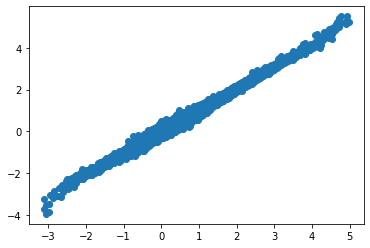

In [64]:
    my_obj.predict_now()